# Simple Linear Regression using `NumPy`

## Imports

In [6]:
# Add the magic command for resetting the notebook state.
%reset -f

In [7]:
# imports and constants here
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Task 1

## Load Data

- This sample data is from the lectures. It displays sales (in thousands of units) for a particular product as a function of advertising budgets (in thousands of dollars) for TV, radio, and newspaper media.
- Load the dataset from [here](https://github.com/SimeonHristov99/ML_23-24/blob/main/DATA/Advertising.csv). Place the link in the `Imports` section.

In [8]:
ds = pd.read_csv('Advertising.csv')

## Feature engineering

Create a new column `total_spend` which is the sum of the money spent on `TV`, `radio` and `newspaper`.

In [9]:
ds['total_spend'] = ds['TV'] + ds['radio'] + ds['newspaper']

## Exploratory data analysis

**Is there a relationship between `total_spend` advertising spend and `sales`?**

Using the `scatterplot` function from `seaborn` plot the relationship between those two features.

> ***Hint***: to see the docstring directly, type `help(sns.scatterplot)` in a cell.

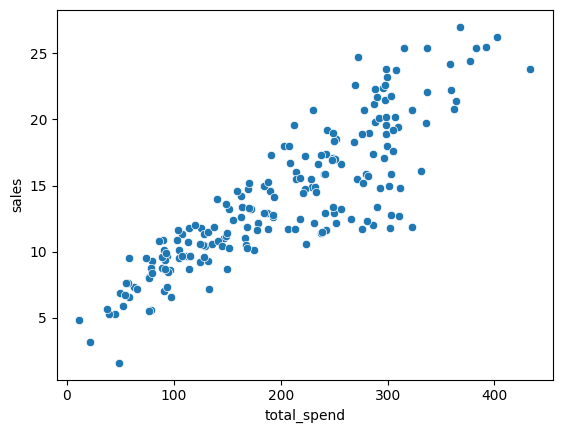

In [10]:
sns.scatterplot(y = ds['sales'], x = ds['total_spend']);

# Task 2

## Least Squares Line

**Understanding what a line of best fit answers:** *If someone was to spend a total of $200 , what would the expected sales be?*

We have simplified this quite a bit by combining all the features into "total spend", but we will come back to individual features later on. For now, let's focus on understanding what a linear regression line can help answer.

Using the `regplot` function from `seaborn` plot the best fitting line.

It is this line that we want to be able to create ourselves.

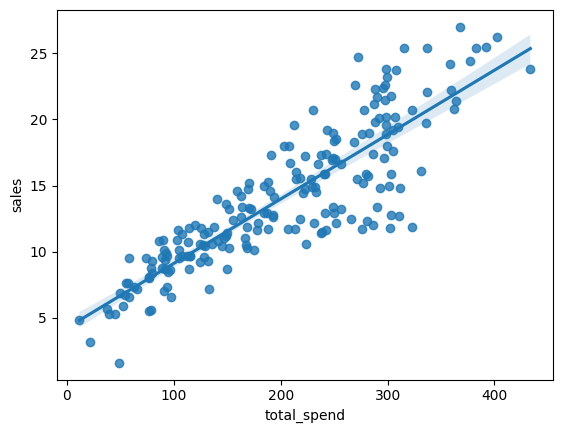

In [11]:
sns.regplot(y = ds['sales'], x = ds['total_spend']);

Let's go ahead and start solving!

Split the data into `X` and `y`. `X` will represent the features our model will accept and `y` will represent the ground-truth value.

In [12]:
X = ds['total_spend']
Y = ds['sales']
print(X, Y)

0      337.1
1      128.9
2      132.4
3      251.3
4      250.0
       ...  
195     55.7
196    107.2
197    192.7
198    391.8
199    249.4
Name: total_spend, Length: 200, dtype: float64 0      22.1
1      10.4
2       9.3
3      18.5
4      12.9
       ... 
195     7.6
196     9.7
197    12.8
198    25.5
199    13.4
Name: sales, Length: 200, dtype: float64


Create an instance of the `np.polynomial.Polynomial` class. Name it `polynomial` and:
1. Print the docstring of its `.fit` method;
2. Print the docstring of its `.convert` method.

In [13]:
help(np.polynomial.Polynomial.fit)
help(np.polynomial.Polynomial.convert)

Help on method fit in module numpy.polynomial._polybase:

fit(x, y, deg, domain=None, rcond=None, full=False, w=None, window=None, symbol='x') method of abc.ABCMeta instance
    Least squares fit to data.
    
    Return a series instance that is the least squares fit to the data
    `y` sampled at `x`. The domain of the returned instance can be
    specified and this will often result in a superior fit with less
    chance of ill conditioning.
    
    Parameters
    ----------
    x : array_like, shape (M,)
        x-coordinates of the M sample points ``(x[i], y[i])``.
    y : array_like, shape (M,)
        y-coordinates of the M sample points ``(x[i], y[i])``.
    deg : int or 1-D array_like
        Degree(s) of the fitting polynomials. If `deg` is a single integer
        all terms up to and including the `deg`'th term are included in the
        fit. For NumPy versions >= 1.11.0 a list of integers specifying the
        degrees of the terms to include may be used instead.
    doma

# Task 3

Fit a first degree polynomial to `X` using `y`. Save the fitted polynomial in `best_line`. Print `best_line`.

In [14]:
best_line = np.polynomial.Polynomial.fit(X, Y, deg = 1)
print(best_line)

15.08338455 + 10.27070814·x


Create a 100 evenly spaced numbers between 0 and 500. Save them in a variable called `potential_spend`.

In [15]:
potential_spend = np.linspace(0, 500, 100)
print(potential_spend)

[  0.           5.05050505  10.1010101   15.15151515  20.2020202
  25.25252525  30.3030303   35.35353535  40.4040404   45.45454545
  50.50505051  55.55555556  60.60606061  65.65656566  70.70707071
  75.75757576  80.80808081  85.85858586  90.90909091  95.95959596
 101.01010101 106.06060606 111.11111111 116.16161616 121.21212121
 126.26262626 131.31313131 136.36363636 141.41414141 146.46464646
 151.51515152 156.56565657 161.61616162 166.66666667 171.71717172
 176.76767677 181.81818182 186.86868687 191.91919192 196.96969697
 202.02020202 207.07070707 212.12121212 217.17171717 222.22222222
 227.27272727 232.32323232 237.37373737 242.42424242 247.47474747
 252.52525253 257.57575758 262.62626263 267.67676768 272.72727273
 277.77777778 282.82828283 287.87878788 292.92929293 297.97979798
 303.03030303 308.08080808 313.13131313 318.18181818 323.23232323
 328.28282828 333.33333333 338.38383838 343.43434343 348.48484848
 353.53535354 358.58585859 363.63636364 368.68686869 373.73737374
 378.787878

Use `best_line` to get the predicted sales for the created `potential_spend`. Plot the obtained line.

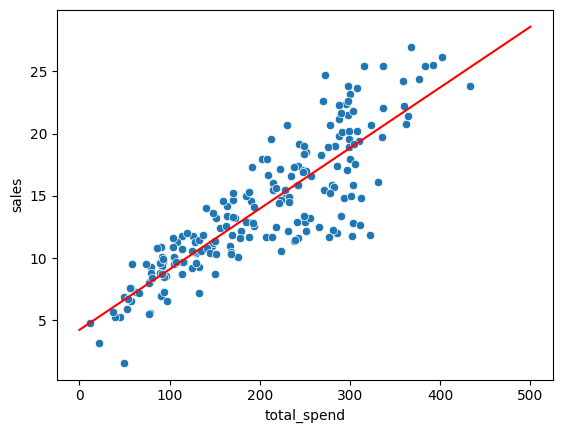

In [70]:
predicted_spend = best_line(potential_spend)
sns.scatterplot(y = ds['sales'], x = ds['total_spend'])

plt.plot(potential_spend, predicted_spend, color = 'r')

Answer programmatically the following question: **Our next ad campaign will have a total spend of $200, how many units do we expect to sell as a result of this?**

In [16]:
best_line(200)

13.980604079845962

# Task 4

## Overfitting, Underfitting, and Measuring Performance

So far, we've created first degree polynomials. We can begin to explore higher orders, but does higher order mean an overall better fit? Is it possible to fit too much? Too little? How would we know and how do we even define a good fit?

Create a third degree polynomial and save it in a variable called `best_line_deg3`.

In [17]:
best_line_deg3 = np.polynomial.Polynomial.fit(X, Y, deg = 3)
best_line_deg3

Polynomial([14.98850835,  9.17640799,  0.71551447,  2.88766058], domain=[ 11.7, 433.6], window=[-1.,  1.], symbol='x')

Use `best_line_deg3` to get the predicted sales for the created `potential_spend`. Plot the obtained line.

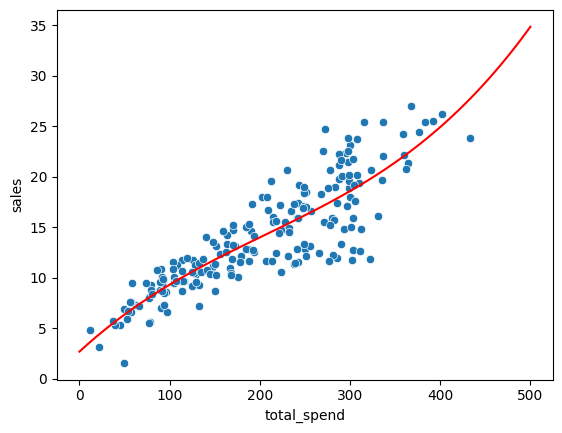

In [19]:
sns.scatterplot(x = X, y = Y)
plt.plot(potential_spend, best_line_deg3(potential_spend), color = 'r')

## Multiple Features

The real data had 3 features. Would using them lead to a more accurate result?

Split the dataset into `X` and `y` where `X` contains all original features.

In [26]:
X = ds[['TV', 'radio', 'newspaper']]
print(X, Y)

        TV  radio  newspaper
0    230.1   37.8       69.2
1     44.5   39.3       45.1
2     17.2   45.9       69.3
3    151.5   41.3       58.5
4    180.8   10.8       58.4
..     ...    ...        ...
195   38.2    3.7       13.8
196   94.2    4.9        8.1
197  177.0    9.3        6.4
198  283.6   42.0       66.2
199  232.1    8.6        8.7

[200 rows x 3 columns] 0      22.1
1      10.4
2       9.3
3      18.5
4      12.9
       ... 
195     7.6
196     9.7
197    12.8
198    25.5
199    13.4
Name: sales, Length: 200, dtype: float64


Create a first degree polynomial using the three features.

**Uh oh! Polyfit only works with a 1D `X` array! We'll need to move on to a more powerful library...**